## Import Libraries & Load Dataset

In [1]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt

## Microsoft Dataset

In [2]:
data = pd.read_csv("Microsoft_Stock.csv")
data.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [3]:
data["Date"] = pd.to_datetime(data["Date"]).dt.date
data = data[["Date","Close"]]
data.head()

,Date,Close
0,2015-04-01,40.72
1,2015-04-02,40.29
2,2015-04-06,41.55
3,2015-04-07,41.53
4,2015-04-08,41.42


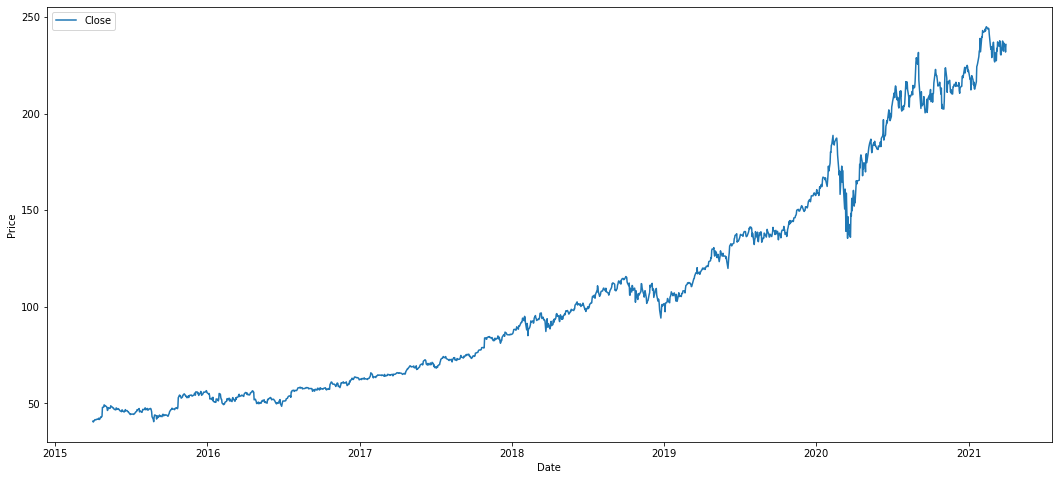

In [4]:
data.set_index("Date").plot(figsize=(18,8),xlabel="Date",ylabel="Price")

In [5]:
data.rename(columns={"Date":"ds","Close":"y"},inplace=True)

# Model
## fbprophet

In [6]:
prophet = Prophet()
prophet.fit(data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
future = prophet.make_future_dataframe(periods=365)
forecast = prophet.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1871,2022-03-27,309.679666,288.355510,317.497436,297.489949,323.007377,-7.111422,-7.111422,-7.111422,-1.315733,-1.315733,-1.315733,-5.795688,-5.795688,-5.795688,0.0,0.0,0.0,302.568244
1872,2022-03-28,309.865963,291.801427,320.176692,297.626484,323.235126,-5.203910,-5.203910,-5.203910,0.418614,0.418614,0.418614,-5.622525,-5.622525,-5.622525,0.0,0.0,0.0,304.662052
1873,2022-03-29,310.052259,291.680012,319.691498,297.763715,323.445457,-4.888941,-4.888941,-4.888941,0.541335,0.541335,0.541335,-5.430276,-5.430276,-5.430276,0.0,0.0,0.0,305.163319
1874,2022-03-30,310.238556,291.608331,320.390691,297.900947,323.655645,-4.636612,-4.636612,-4.636612,0.584572,0.584572,0.584572,-5.221184,-5.221184,-5.221184,0.0,0.0,0.0,305.601944
1875,2022-03-31,310.424853,292.037139,320.850529,298.027475,323.873656,-4.439377,-4.439377,-4.439377,0.558208,0.558208,0.558208,-4.997585,-4.997585,-4.997585,0.0,0.0,0.0,305.985476


Text(0.5, 1.0, 'Microsoft price stock forecasting')

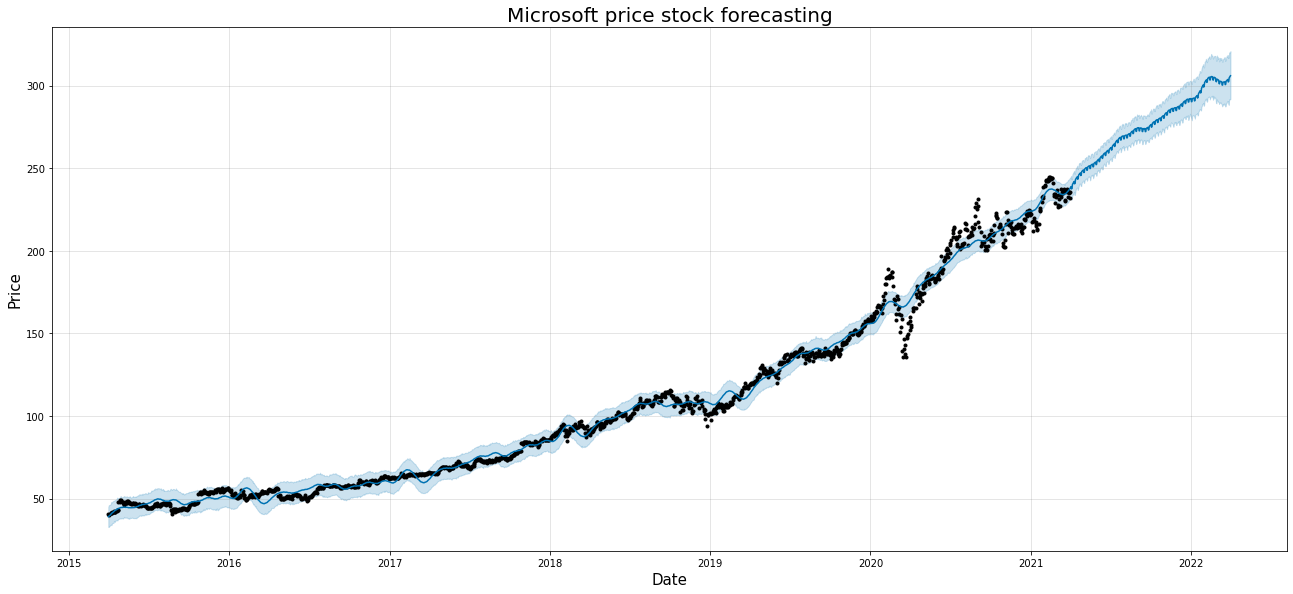

In [8]:
prophet.plot(forecast,figsize=(18,8))
plt.xlabel("Date",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.title("Microsoft price stock forecasting",fontsize=20)

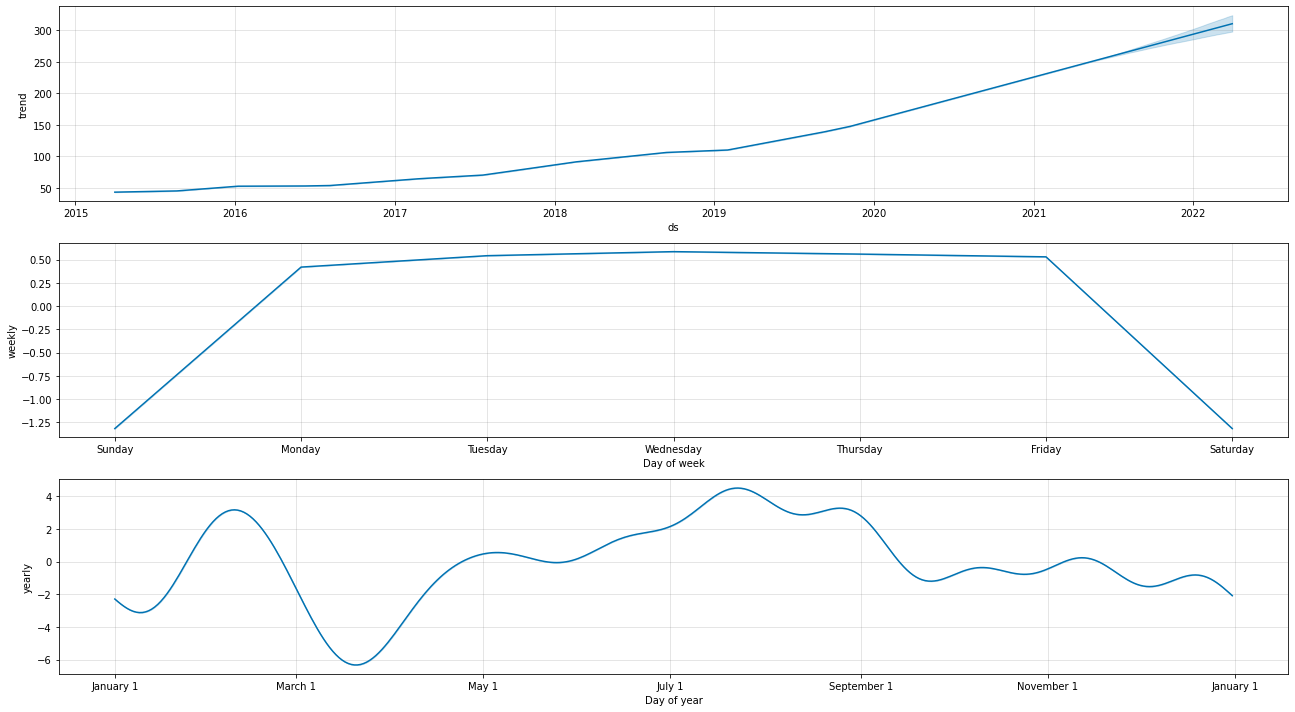

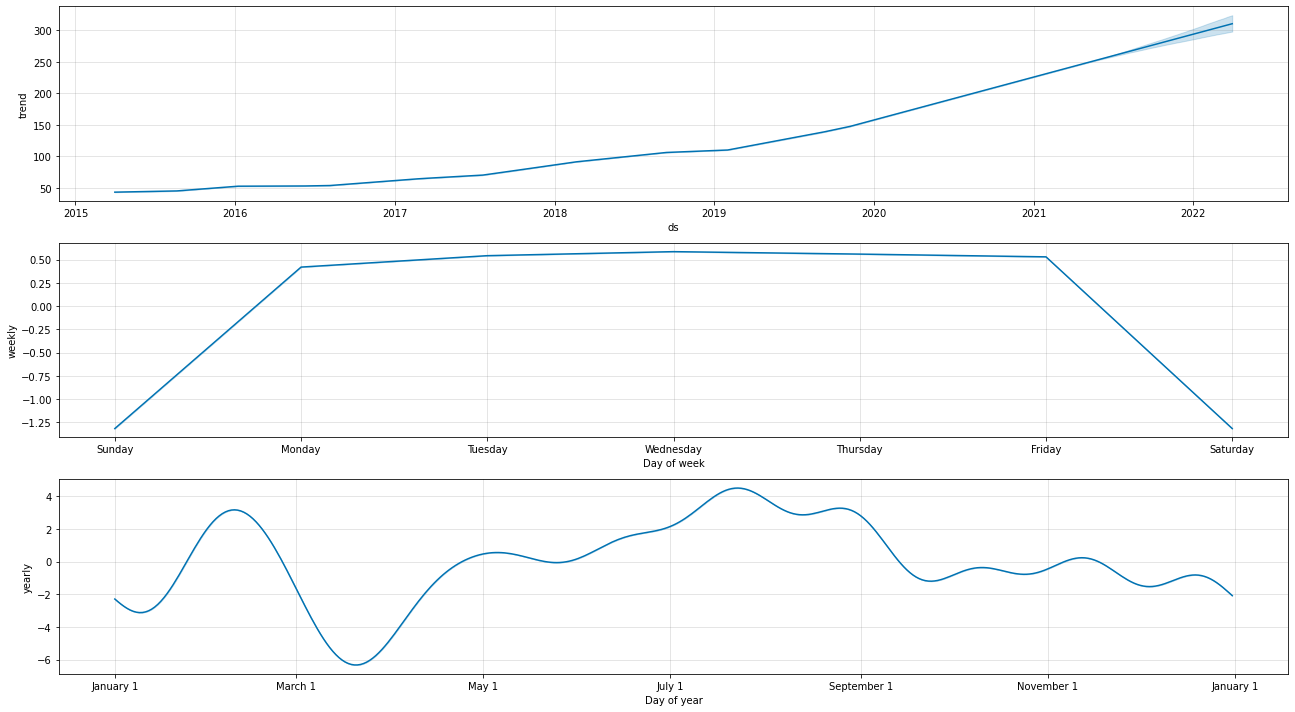

In [9]:
prophet.plot_components(forecast,figsize=(18,10))